In [1]:
from IPython.display import Image 

# Understanding DQN_Navigation
### Galen Ballew, Fall 2018
---

## Implementation

The code for this project is located in 3 separate files:

1. `model.py`  
    > Contains the class for a simple neural network. This network consumes the state of the Unity environment and outputs an action-value vector for the 4 actions available.
2. `dqn_agent.py`
    > Contains the class for a RL Agent. The agent uses two neural networks for fixed-target Q learning and an experience replay buffer. The script also contains several **hyperparameters**.
3. `Unity_DQN.ipynb`
    > This notebook trains and evaluates the Agent within the Banana environment. It also contains several **hyperparameters**. Training may be skipped by altering the `TRAIN_MODEL` boolean. 
---  

## Learning Algorithm

A Deep Q-Network is a reinforcement learning solution in which the traditional Q-table is replaced with a neural network. The gradients in this network act as a function approximator for the action-value function, $q_*$, of policy $\pi_*$.

This solution implements a DQN extremely similar to that in Deepmind's [Human-level control through deep reinforcement learning](https://storage.googleapis.com/deepmind-media/dqn/DQNNaturePaper.pdf). There are 2 notable features of the Deepmind's DQN:

1. Experience Replay
    > During training, state/action/reward/next-state tuples $(SARS^\prime)$ are added to a replay buffer. When the agent learns, it samples from the buffer. Doing this helps to break the temporal correlation of experiences or $(SARS^\prime)$. The gradient function approximation becomes less biased, therefor handling the variance and sequence of experiences better. This results in a more stable convergence of action-values.  
2. Fixed Q-Targets  
    > During training, two neural networks are instantiated $q$ and $\hat{q}$, where $\hat{q}$ is the learning network. When updating the parameters in $\hat{q}$,  the temporal difference error is calulated using the parameters from $q$. This creates a stable trajectory for gradient descent (akin to a stationary horizon). The parameters in $\hat{q}$ are copied to $q$ every so often to keep the trajectory in line with recent learning/convergence. 
---

## Architecture  

`agent.py` produces neural networks with 2 hidden layers with 64 nodes each. The input layer has 37 (determined by the state space of the environment) and the output layer has 4 nodes (determined by the action space). All of the layers contain ReLU activation functions. 

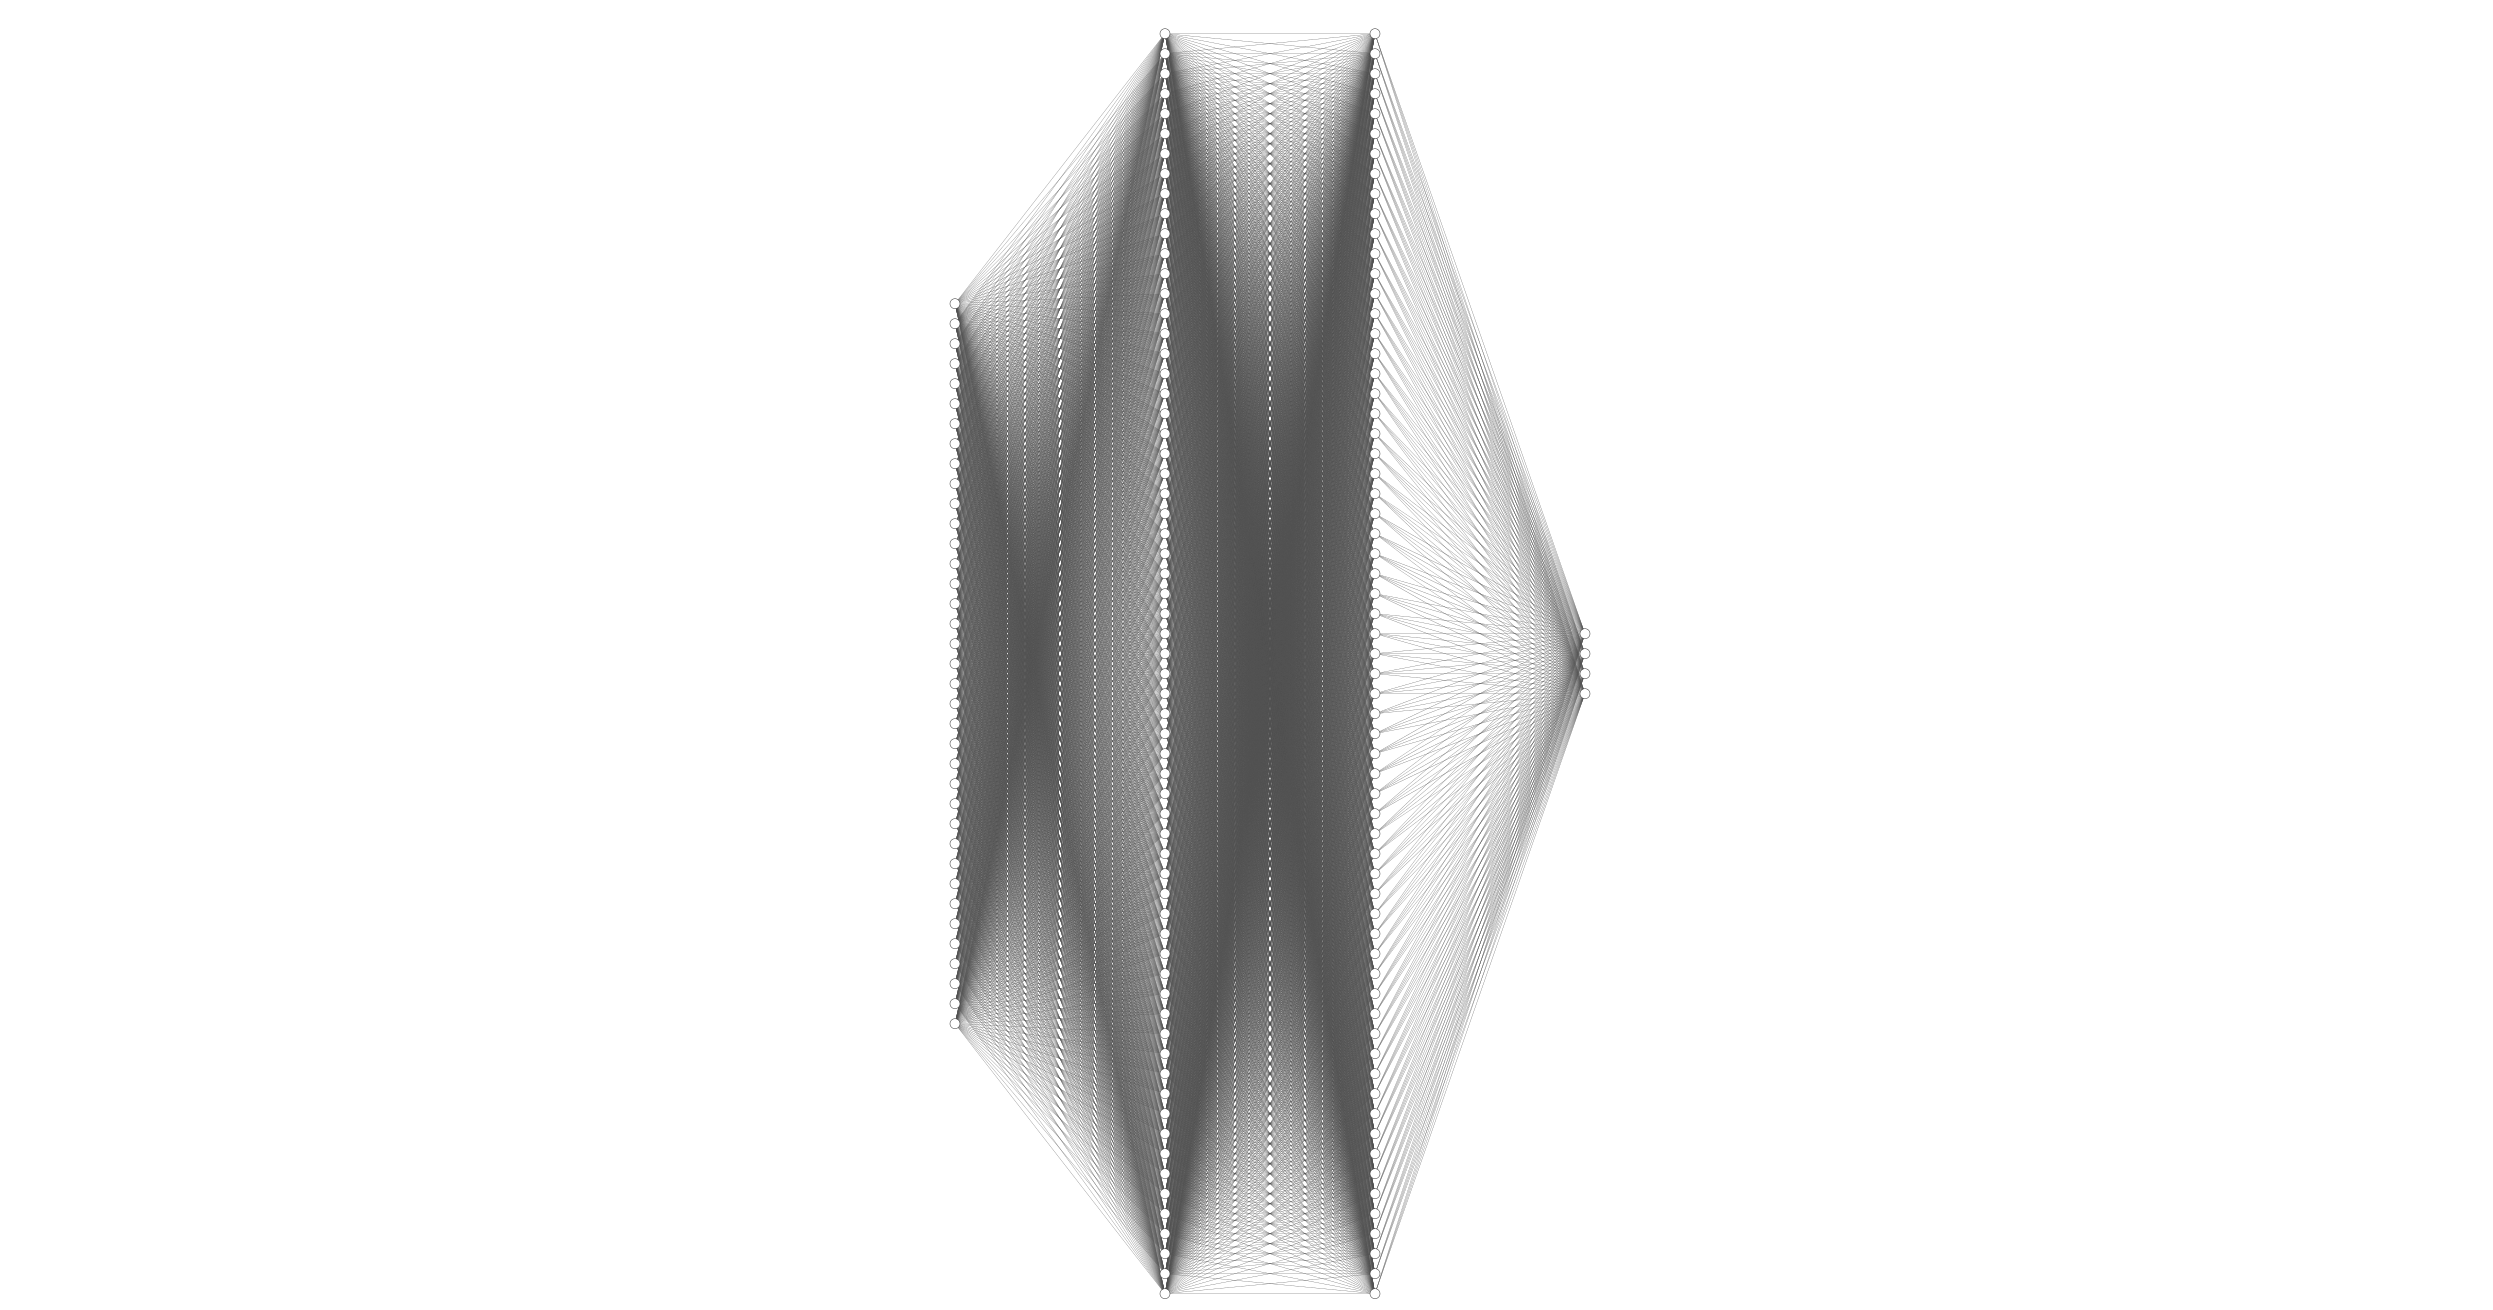

In [2]:
Image(filename='images/nn.png')

## Hyperparameters

```
BUFFER_SIZE = int(1e5)  # replay buffer size  
BATCH_SIZE = 64         # minibatch size  
GAMMA = 0.99            # discount factor  
TAU = 1e-3              # for soft update of target parameters
LR = 5e-4               # learning rate 
UPDATE_EVERY = 4        # how often to update the network
n_episodes = 1400       # max number of episodes for the training loop
max_t = 1000            # max steps in every episode 
eps_start=1.0           # starting value of epsilon
eps_end=0.01            # final value of epsilon
eps_decay=0.995         # decay rate for epsilon
```
---

Many of these hyperparameters can be found in the original DQN paper [Human-level control through deep reinforcement learning](https://storage.googleapis.com/deepmind-media/dqn/DQNNaturePaper.pdf) (page 10). Some can also be found in a follow-up paper [Deep Reinforcement Learning with Double Q-learning](https://arxiv.org/pdf/1509.06461.pdf) (page 9). 

## Results

The agent solved the environment in episode 367 with a average score of 13.0. Over the 1400 training episodes, the best average score was 16.78 in episode 1037  

When testing the network after training ($\epsilon$ reduced to 0.01), the agent scored 16.0 in a single episode.  

A graph of the scores achieved during a particular training session are shown below.

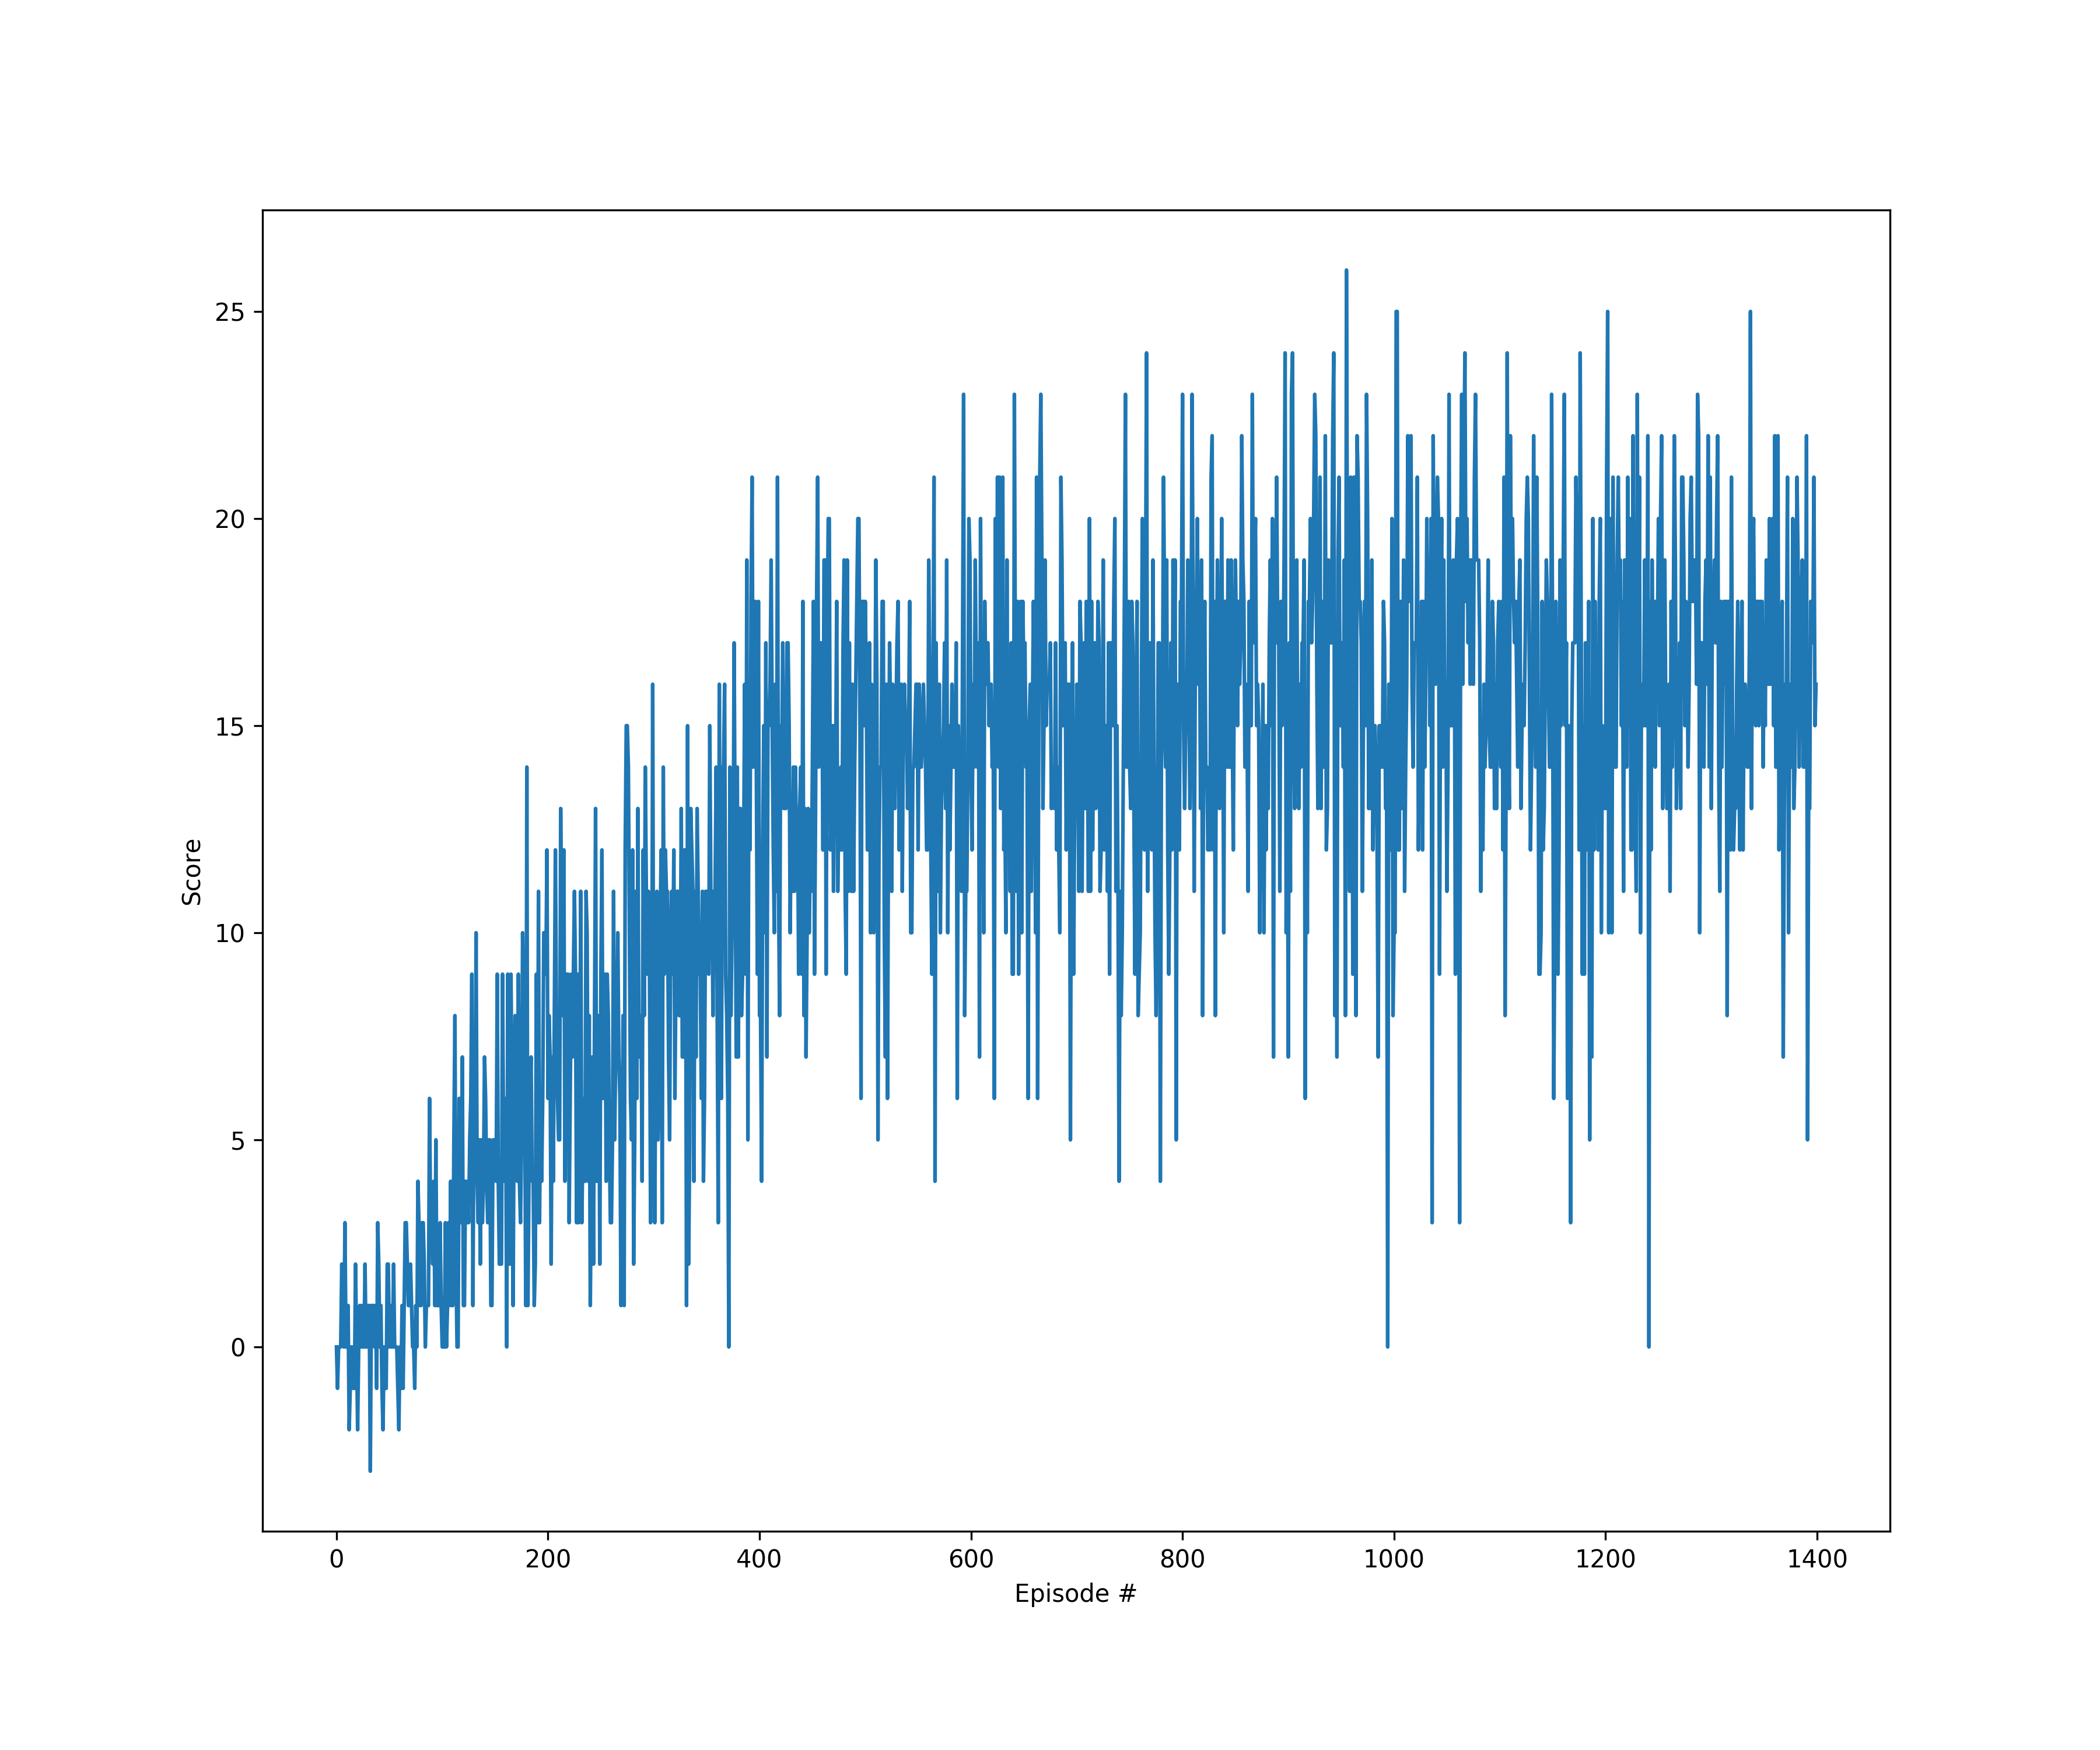

In [3]:
from IPython.display import Image 

Image(filename='scores.png')

---

## Future Work

There are many improvements to be made to Deep Q-Networks. Many of them are implemented in [Rainbow: Combining Improvements in Deep Reinforcement Learning](https://arxiv.org/pdf/1710.02298.pdf).  

Of these, I am particularly interested in **Prioritized Experience Replay**. Rather than sampling at random from the replay buffer, the Agent could utilize a function to sample more important or less frequent experiences (i.e., $SARS^\prime$ tuples). 

I am also interested in experimenting with **Leaky ReLU** activation functions rather than ReLU. Allowing negative values to impact the gradients may result in more consistent and stable convergence during training. The **Maxout** activation function may also be of similar use. It should be noted however that Maxout will double the number of parameters for each neuron, thus increasing training time/complexity.